In [85]:
import pandas as pd
import seaborn as sns
import numpy as np

In [86]:
%matplotlib inline

In [88]:
ny_bg_acs_df = pd.read_csv("ny_bg_2013_enhanced_table.csv")

In [89]:
ny_bg_acs_df.head(1)

,county_name,geoid,intersects_zip,intersects_county_subdivision,geo_name,full_geoid,geoid_tiger,total_population,land_area_square_meters,population_density_per_square_kilometer,...,total_asian_american,total_two_or_more_races,fraction_population_white,fraction_population_african_american,fraction_population_native_american,fraction_population_asian_american,fraction_population_two_or_more_races,geom_geojson,x,y
0,Albany,36001,"{12007,12042,12046,12067,12083,12087,12143,121...","{Coeymans,Greenville,""New Baltimore"",""New Scot...","Block Group 3, Census Tract 144.01, Albany Cou...",15000US360010144013,360010144013,1314,61500000,21.36887,...,0,0,1,0,0,0,0,"{""type"":""Polygon"",""coordinates"":[[[-73.975523,...",-73.9311,42.49366


In [90]:
ny_bg_acs_df_clean = ny_bg_acs_df.dropna()

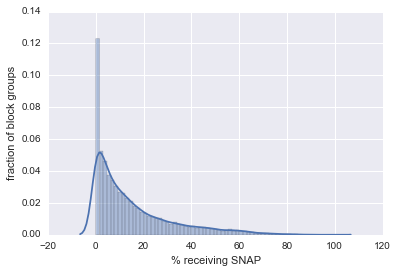

In [92]:
sns.distplot([x * 100 for x in list(ny_bg_acs_df_clean["fraction_receiving_snap"])], 
             label="percent of households receiving SNAP 12 month")
sns.axlabel("% receiving SNAP", "fraction of block groups")

In [94]:
suffolk_ny_bg_acs_df_clean = ny_bg_acs_df_clean[ny_bg_acs_df_clean["county_name"] == "Suffolk"]

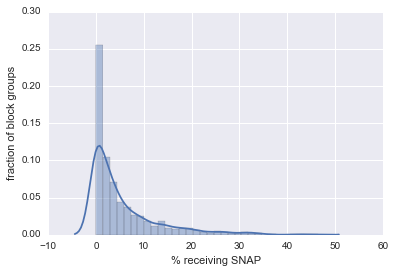

In [95]:
sns.distplot([x * 100 for x in list(suffolk_ny_bg_acs_df_clean["fraction_receiving_snap"])], 
             label="percent of households receiving SNAP 12 month")
sns.axlabel("% receiving SNAP", "fraction of block groups")

In [102]:
ny_bg_acs_df_clean.groupby("county_name").mean()["fraction_receiving_snap"].order()

county_name
Putnam          0.034645
Hamilton        0.041650
Nassau          0.044606
Suffolk         0.054950
Saratoga        0.068455
Westchester     0.075688
Dutchess        0.086263
Columbia        0.090656
Wyoming         0.092537
Tompkins        0.095137
Otsego          0.098539
Seneca          0.098703
Warren          0.100119
Greene          0.101293
Rockland        0.101894
Schuyler        0.102487
Ontario         0.102776
Essex           0.104491
Madison         0.104594
Genesee         0.105159
Ulster          0.108547
Cayuga          0.108632
Schoharie       0.110240
Orange          0.112447
Tioga           0.113476
Delaware        0.116228
Richmond        0.117580
Albany          0.118160
Wayne           0.118469
Livingston      0.120411
                  ...   
Steuben         0.130015
Sullivan        0.130631
Washington      0.131818
Queens          0.132892
Yates           0.134264
Cortland        0.134631
New York        0.143265
Onondaga        0.145399
Cattaraugus  

In [47]:
import networkx as nx
import csv

In [68]:
with open("ny_bg_2013_enhanced_table.csv", "rb") as fc:
    cr = csv.DictReader(fc)
    result_set = list(cr)

In [62]:
with open("ny_bg_2013_touches.csv", "rb") as fc:
    cr = csv.DictReader(fc)
    edge_set = list(cr)

In [73]:
G = nx.Graph()

In [74]:
for node in result_set:
    if node["county_name"] == "Suffolk":
        try:
            snap_frac = float(node["fraction_receiving_snap"])
            node["weight"] = 100 * snap_frac
        except ValueError:
            snap_frac = None
            node["weight"] = 0
        
        
        if  snap_frac >= 0.0 and snap_frac < 0.05:
            node["snap_class"] = "<0.05"
        elif snap_frac >= 0.05 and snap_frac < 0.15:
            node["snap_class"] = "0.05-0.15"
        elif snap_frac >= 0.15 and snap_frac < 0.25:
            node["snap_class"] = "0.15-0.25"
        elif snap_frac >= 0.25:
            node["snap_class"] = ">= 0.25"
        else:
            node["snap_class"] = "None"
        G.add_node(node["geoid_tiger"], node)

In [75]:
for edge in edge_set:
    if edge["geoid1"] in G:
        if edge["geoid2"] in G:
            G.add_edge(edge["geoid1"],edge["geoid2"])

In [76]:
nx.write_graphml(G, "suffolk_acs_2013.graphml")

In [106]:
suffolk_bg_acs_df_na = suffolk_bg_acs_df.dropna()

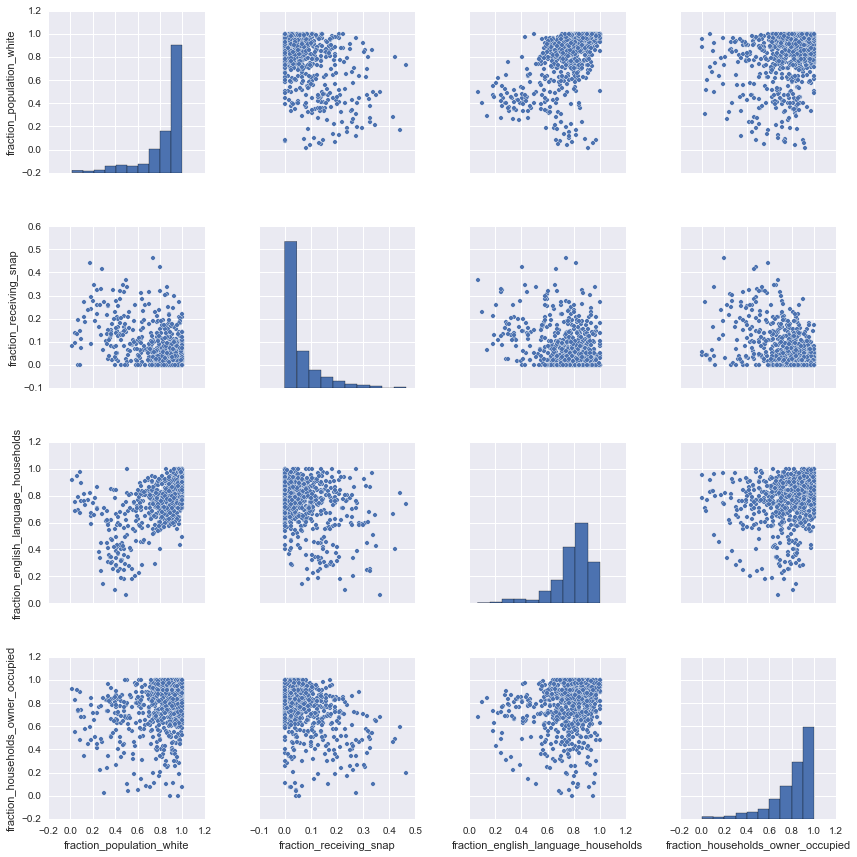

In [108]:
sns.pairplot(suffolk_ny_bg_acs_df_clean, vars=["fraction_population_white", "fraction_receiving_snap", 
                                         "fraction_english_language_households", "fraction_households_owner_occupied"])